# Heart Disease Prediction Classification Project

This project builds explores various Python-based Data Science libraries in order to build a Machine Learning Model capable of predicting if a person has a heart disease based on their medical attributes.

## Importing Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing EDA and Plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#For PCA part
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Plots will appear inside notebooks
%matplotlib inline

# Importing Machine Learning Models from SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Importing Evaluation Libraries
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, RocCurveDisplay, mean_squared_error, pairwise_distances, classification_report, roc_curve, auc

from sklearn.preprocessing import label_binarize
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from scipy import interp

!pip install eli5
!pip install shap

import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values

In [ ]:
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Load and explore the Dataset

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/algorithmic_machine_learning/project_dataset/heart-disease.csv")
df.shape

(303, 14)

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)


## Exploratory Data Analysis (EDA)

In [ ]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [ ]:
# Understanding Data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<Axes: >

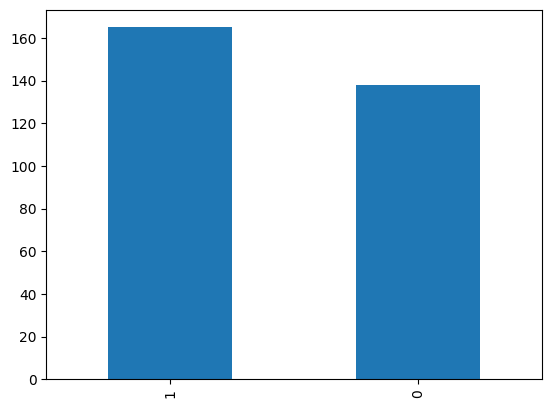

In [ ]:
df["target"].value_counts().plot(kind="bar")

In [ ]:
# Getting descriptive stats for the dataset
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [ ]:
# Finding Missing values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency according to Sex

In [ ]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [ ]:
# Check relation with the target
pd.crosstab(df["sex"], df["target"])

target    0   1
sex            
0        24  72
1       114  93

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

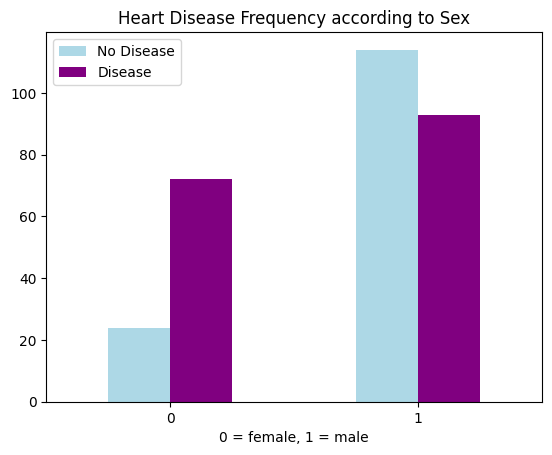

In [ ]:
# Plotting the relation
pd.crosstab(df["sex"], df["target"]).plot(kind="bar", color=['lightblue', 'purple'])

# Adding Info
plt.title("Heart Disease Frequency according to Sex")
plt.xlabel("0 = female, 1 = male")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0)

### Age vs Resting Blood Pressure (trestbps) for Heart Disease

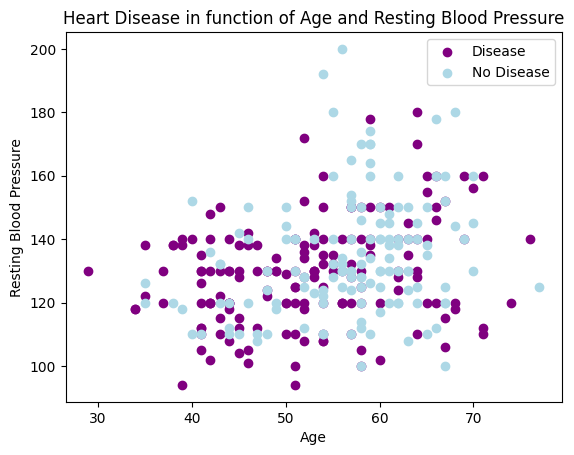

In [ ]:
# Create another Plot
plt.figure()

# Scatter with Positive Examples
plt.scatter(df.age[df.target == 1], df.trestbps[df.target == 1], c="purple")

# Scatter with Negative Examples
plt.scatter(df.age[df.target == 0], df.trestbps[df.target == 0], c="lightblue")

# Adding Info
plt.title("Heart Disease in function of Age and Resting Blood Pressure")
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.legend(["Disease", "No Disease"])

<Axes: ylabel='Frequency'>

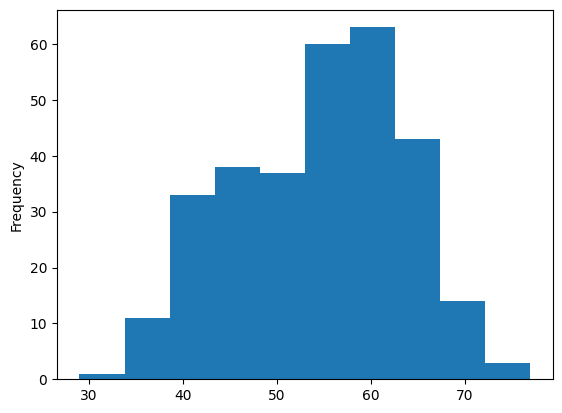

In [ ]:
# Check distribution of age
df.age.plot(kind="hist")

### Heart Disease Frequency Per Chest Pain
#### cp - chest pain type
* 0: Typical angina: chest pain related decrease blood supply to the heart
* 1: Atypical angina: chest pain not related to heart
* 2: Non-anginal pain: typically esophageal spasms (non heart related)
* 3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
pd.crosstab(df.cp, df.target)

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

In [ ]:
pd.crosstab(df["cp"], df["target"])

target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16

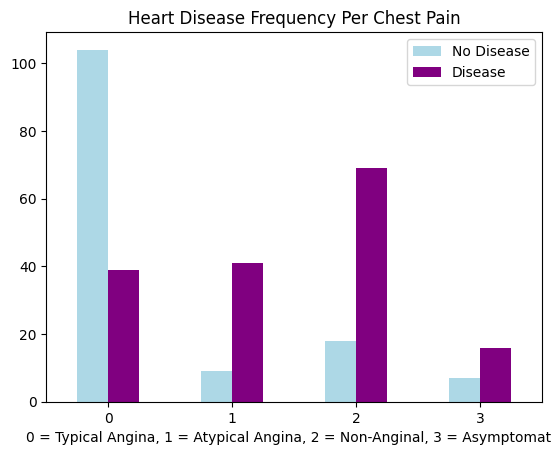

In [ ]:
# Plotting the Crosstab
pd.crosstab(df.cp, df.target).plot(kind="bar", color=["lightblue", "purple"])

# Additional Info
plt.title("Heart Disease Frequency Per Chest Pain")
plt.xlabel("0 = Typical Angina, 1 = Atypical Angina, 2 = Non-Anginal, 3 = Asymptomatic")
plt.xticks(rotation=0)
plt.legend(["No Disease", "Disease"])

##Additional Visualization

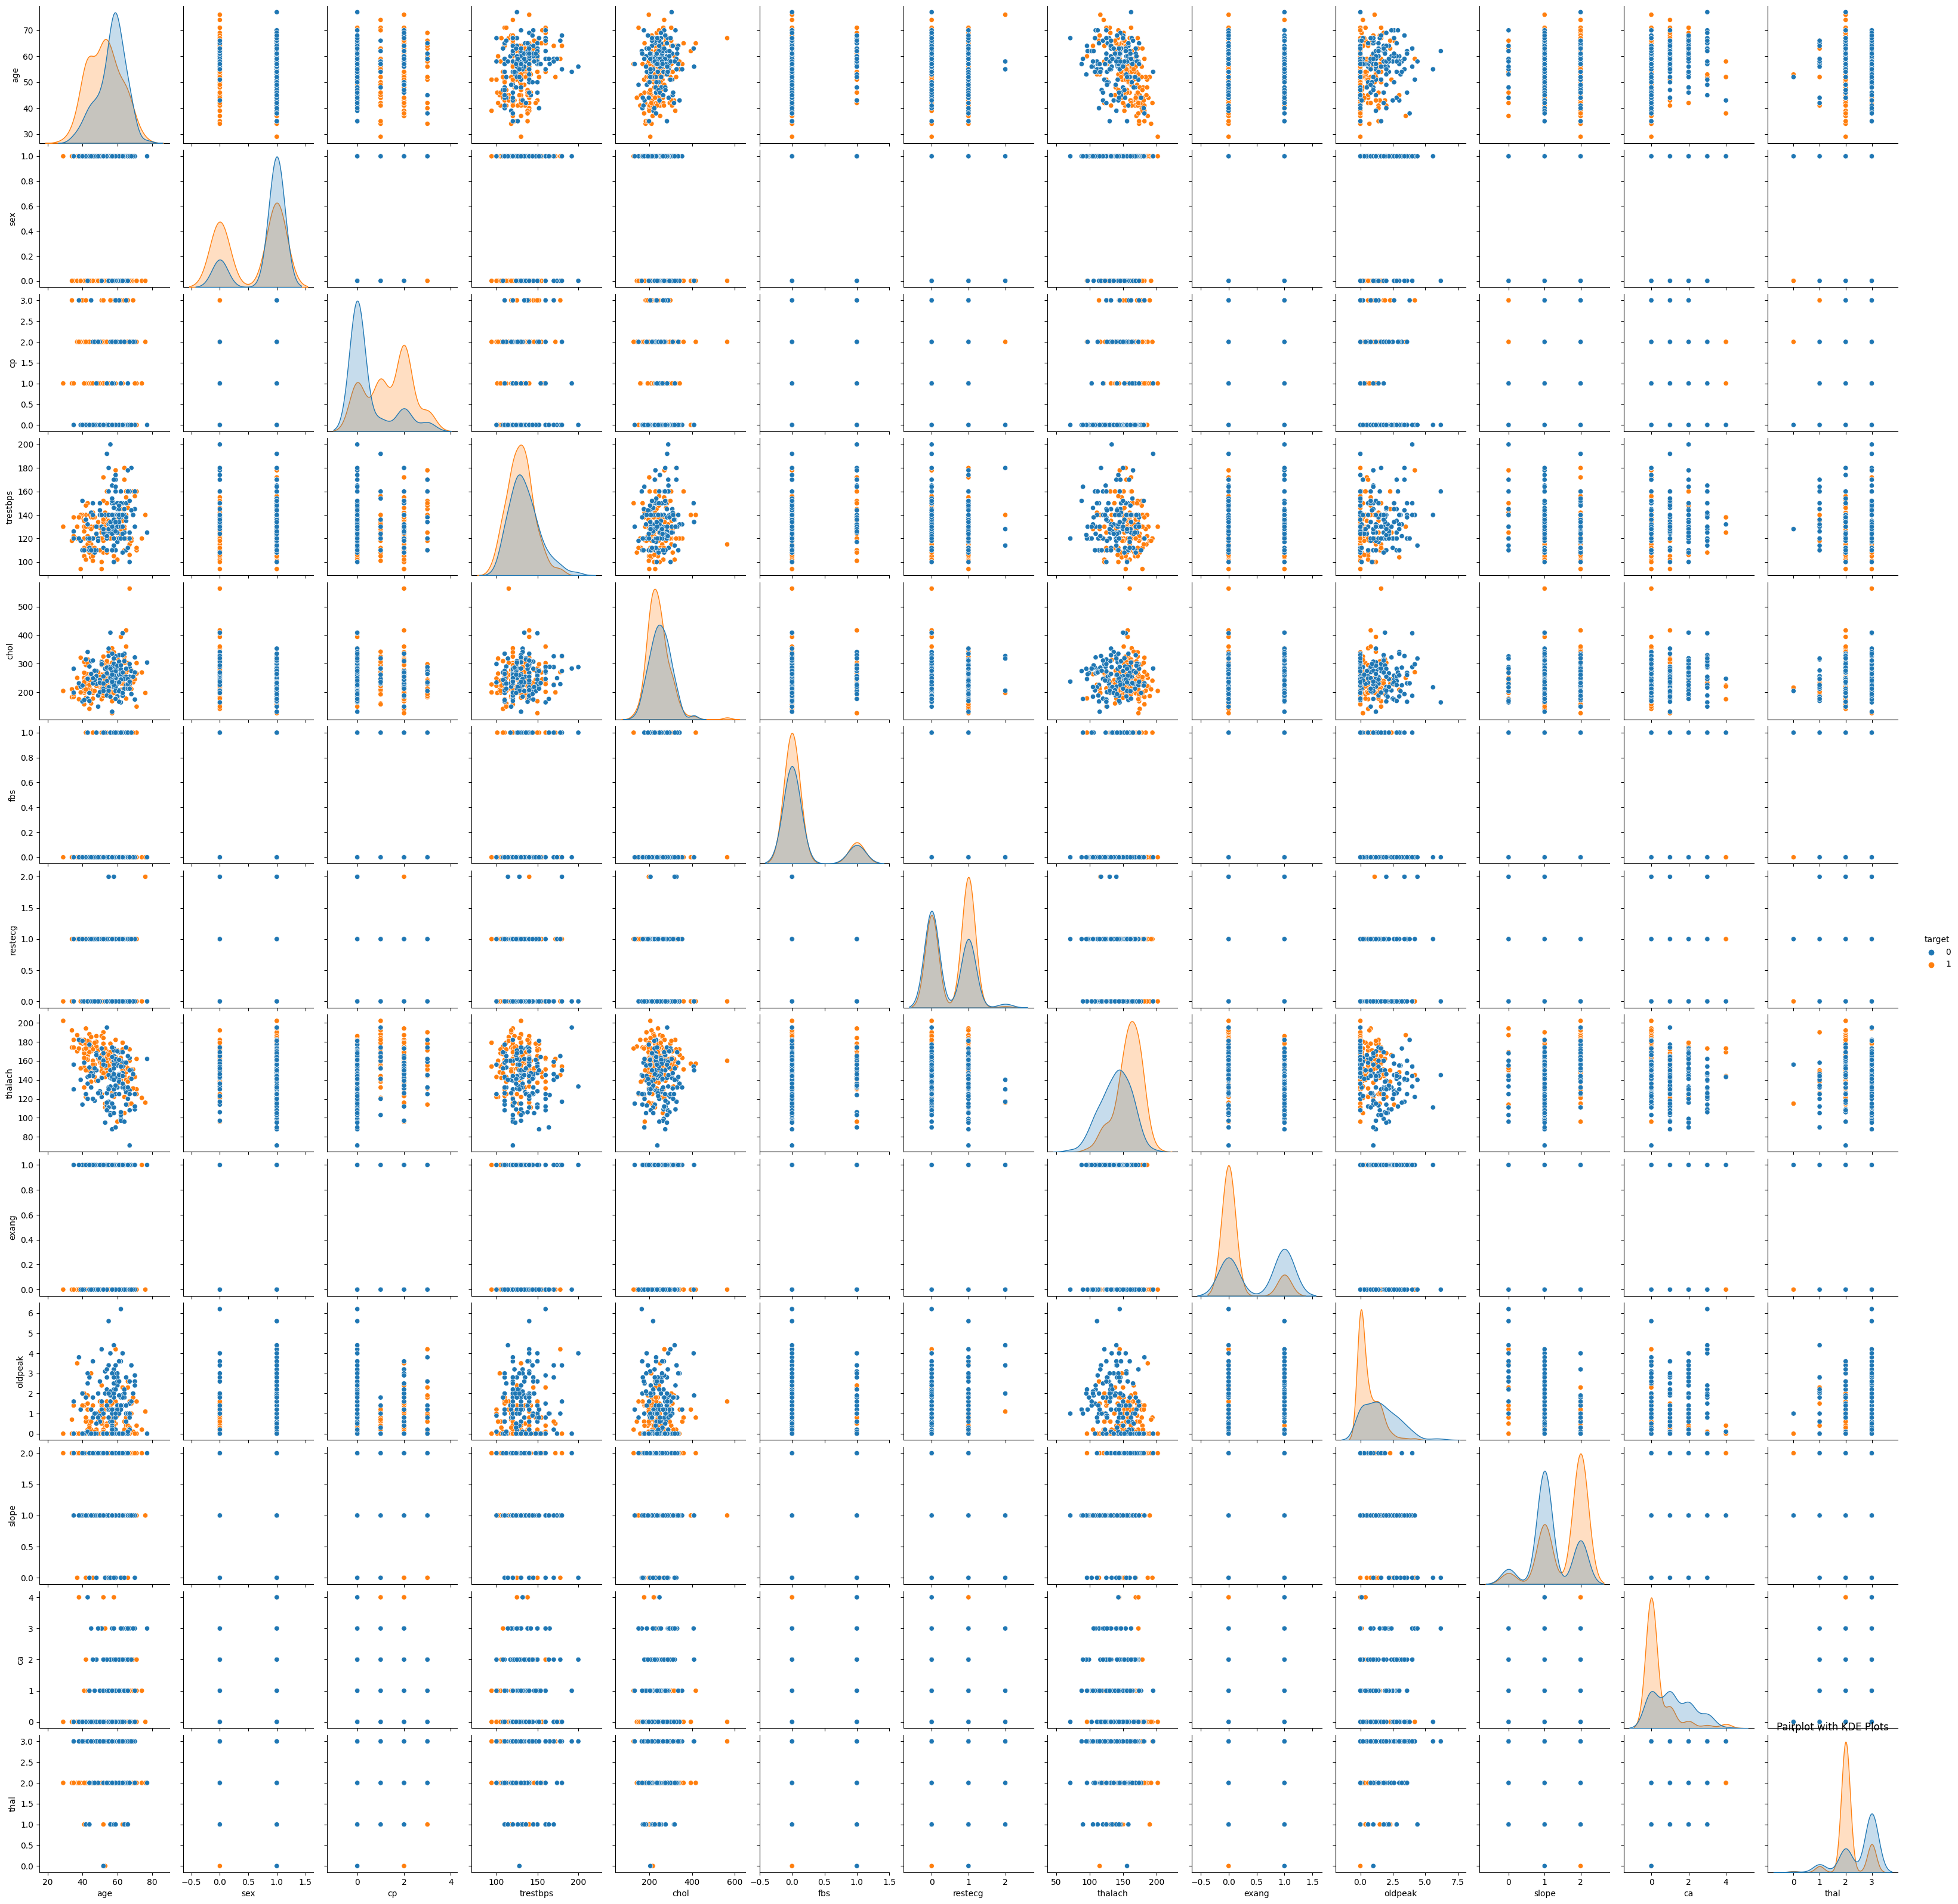

In [ ]:
sns.pairplot(data=df, hue='target', diag_kind='kde')
plt.title('Pairplot with KDE Plots')
plt.show()

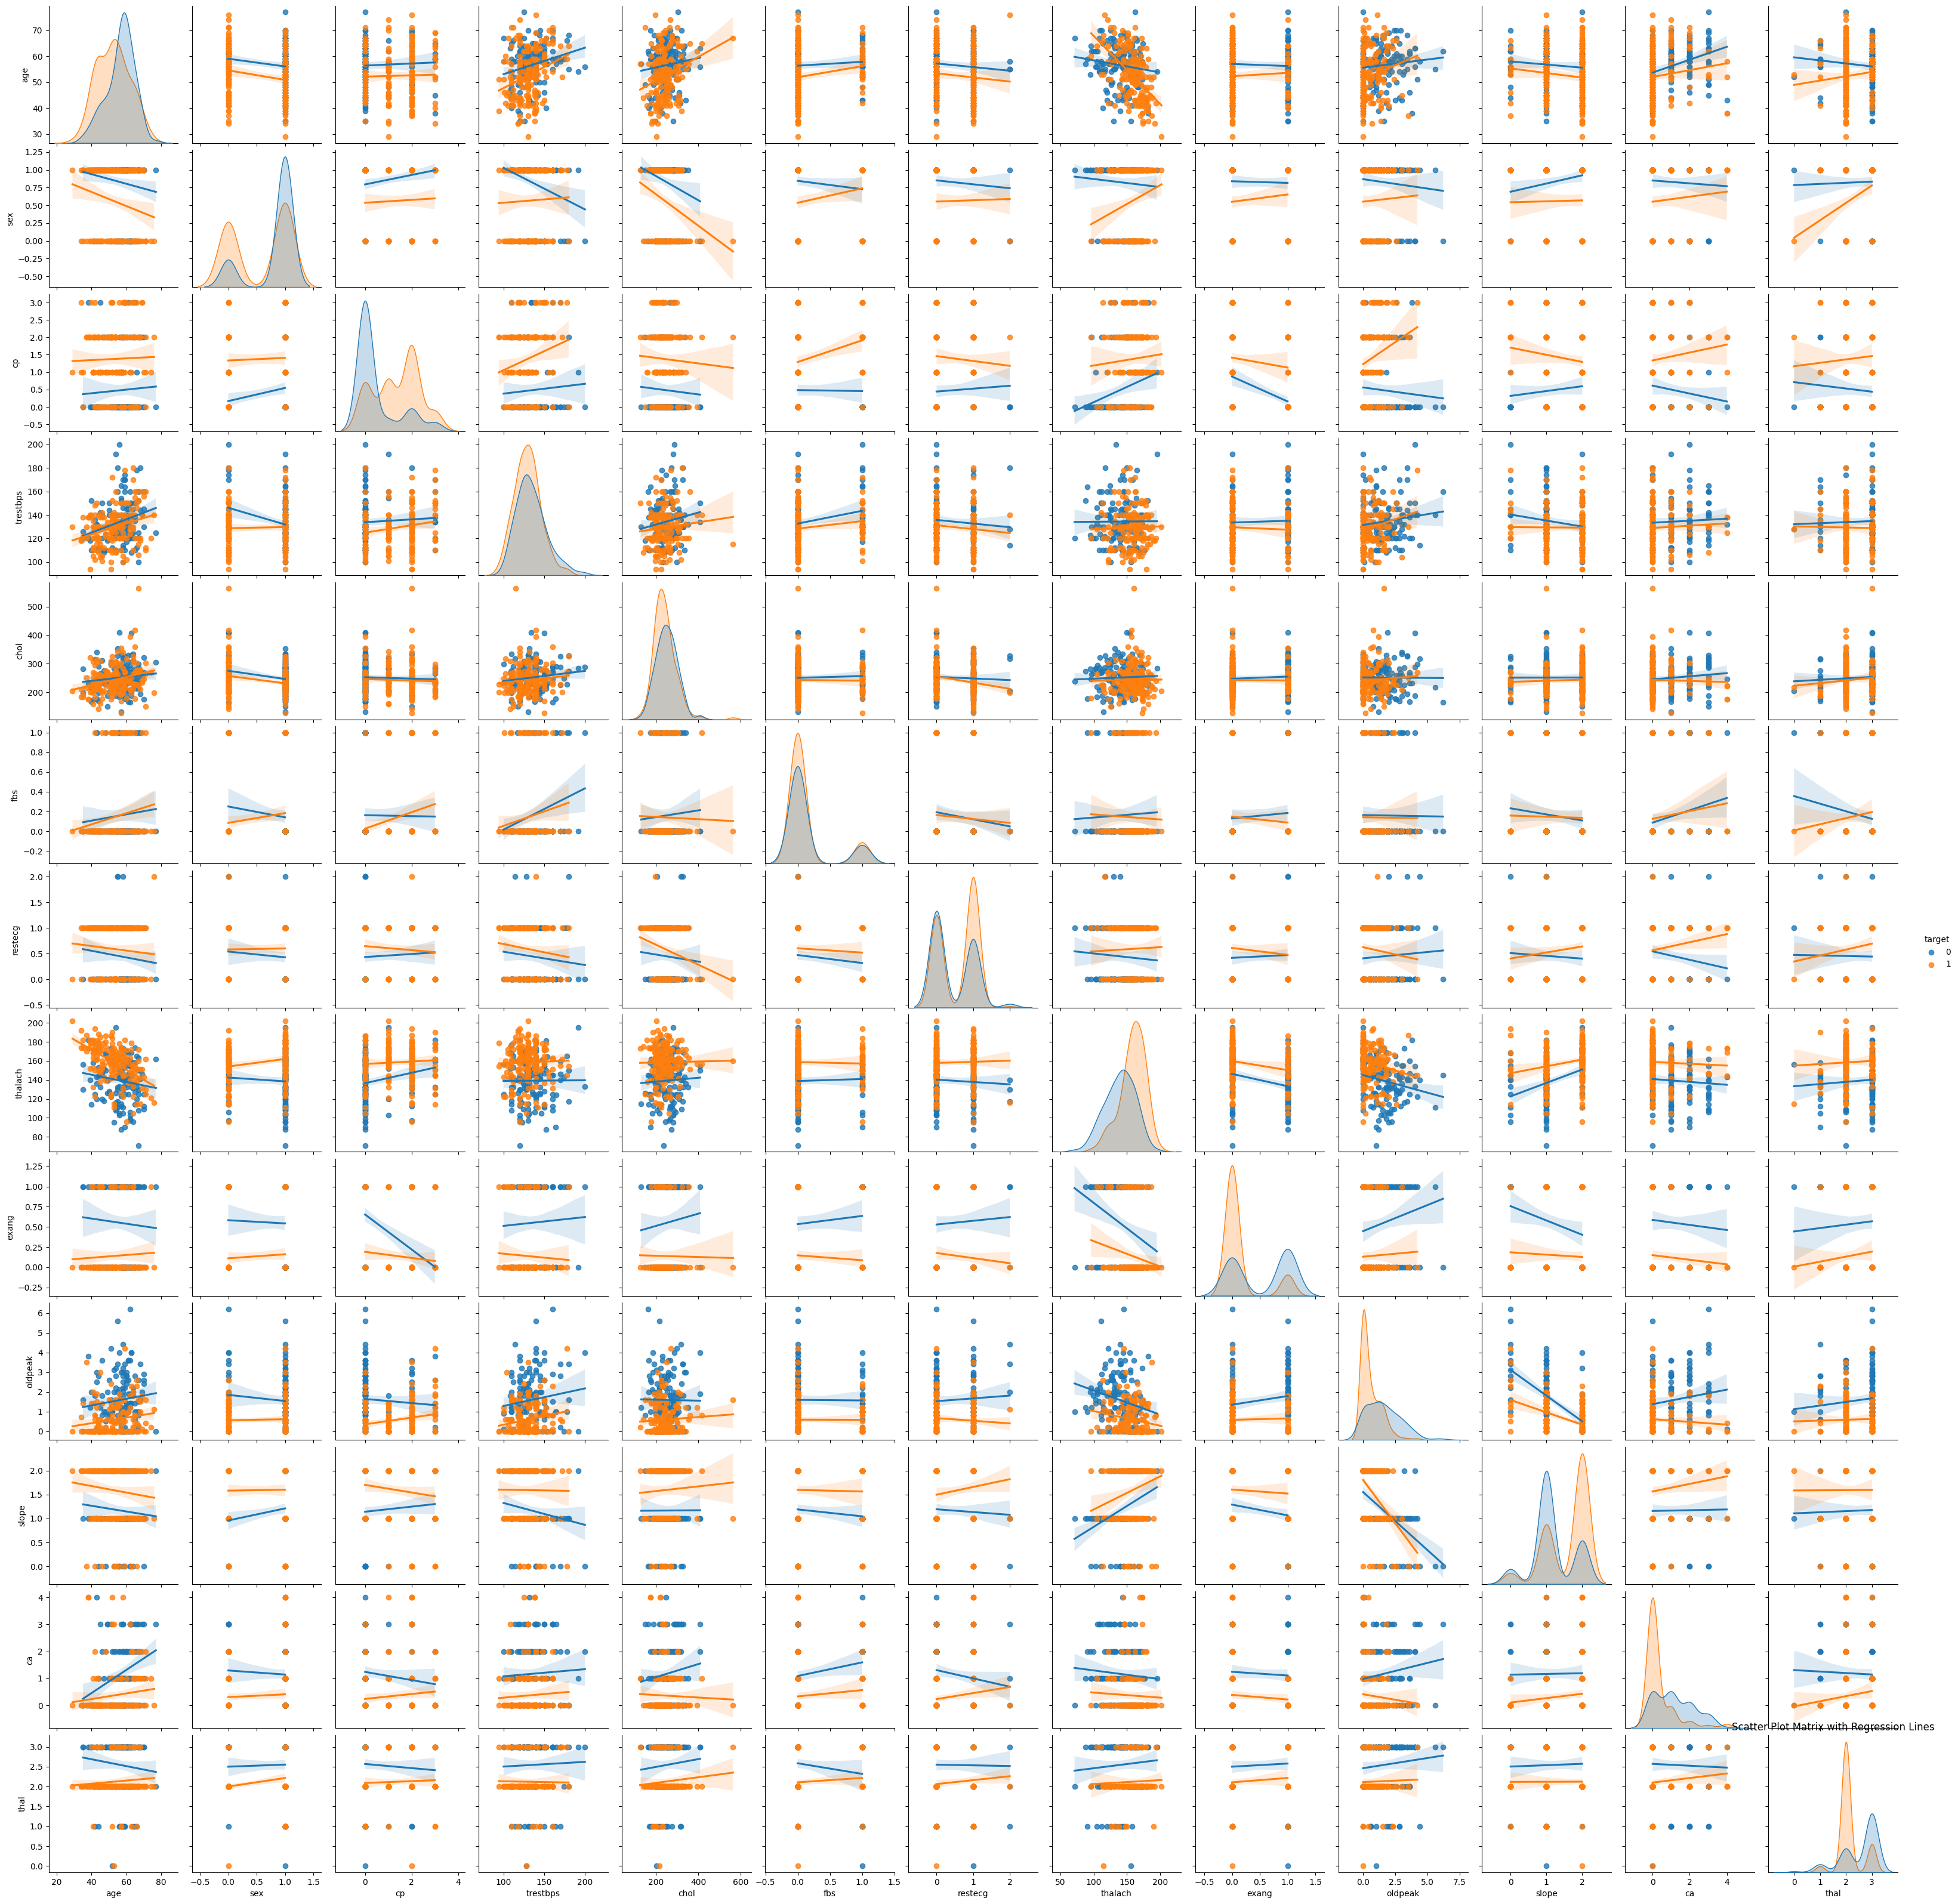

In [ ]:
sns.pairplot(data=df, kind='reg', hue='target')
plt.title('Scatter Plot Matrix with Regression Lines')
plt.show()

##PCA data processing

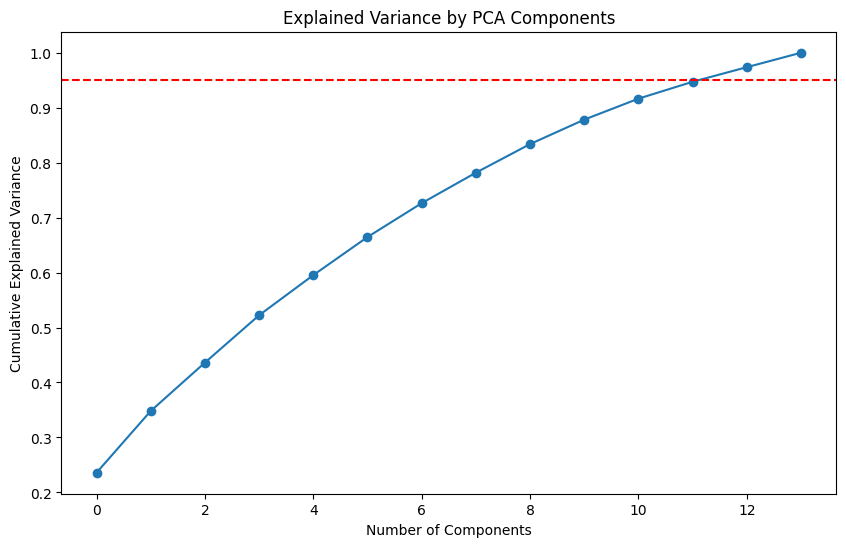

   Principal Component 1  Principal Component 2  Principal Component 3  \
0              -0.051739               2.624022               0.990054   
1              -0.817441              -0.730375              -0.235928   
2              -2.057599              -0.039098              -0.519839   
3              -1.903043              -0.596701               0.076204   
4              -0.768371               0.412545              -2.187455   

   Principal Component 4  Principal Component 5  Principal Component 6  \
0               3.479328               0.362773               1.695836   
1               2.767545               2.258404              -0.808414   
2               0.081198               0.860416               0.752783   
3              -0.082624              -0.235141              -0.500292   
4              -1.988510               0.017448              -0.074219   

   Principal Component 7  Principal Component 8  Principal Component 9  \
0              -0.135706            

In [ ]:
# Recoding of discrete variables
for feature in df.columns:
    if df[feature].dtype == 'object':
        df[feature] = pd.Categorical(df[feature]).codes
df.head(10)

# Apply PCA
pca = PCA()
principalComponents = pca.fit_transform(scaled_df)

# Determine the number of components to keep
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.axhline(y=0.95, color='r', linestyle='--') # Line for 95% explained variance
plt.show()

# Select the number of components that explain 95% of the variance
n_components = np.where(cumulative_variance >= 0.95)[0][0] + 1

# Apply PCA with the selected number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame for the principal components
principal_df = pd.DataFrame(data=principal_components,
                            columns=['Principal Component {}'.format(i) for i in range(1, n_components+1)])

# Display the first few rows of the DataFrame with principal components
print(principal_df.head())

### Making a Correlation Matrix

In [ ]:
corr_matrix = df.corr()
corr_matrix

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

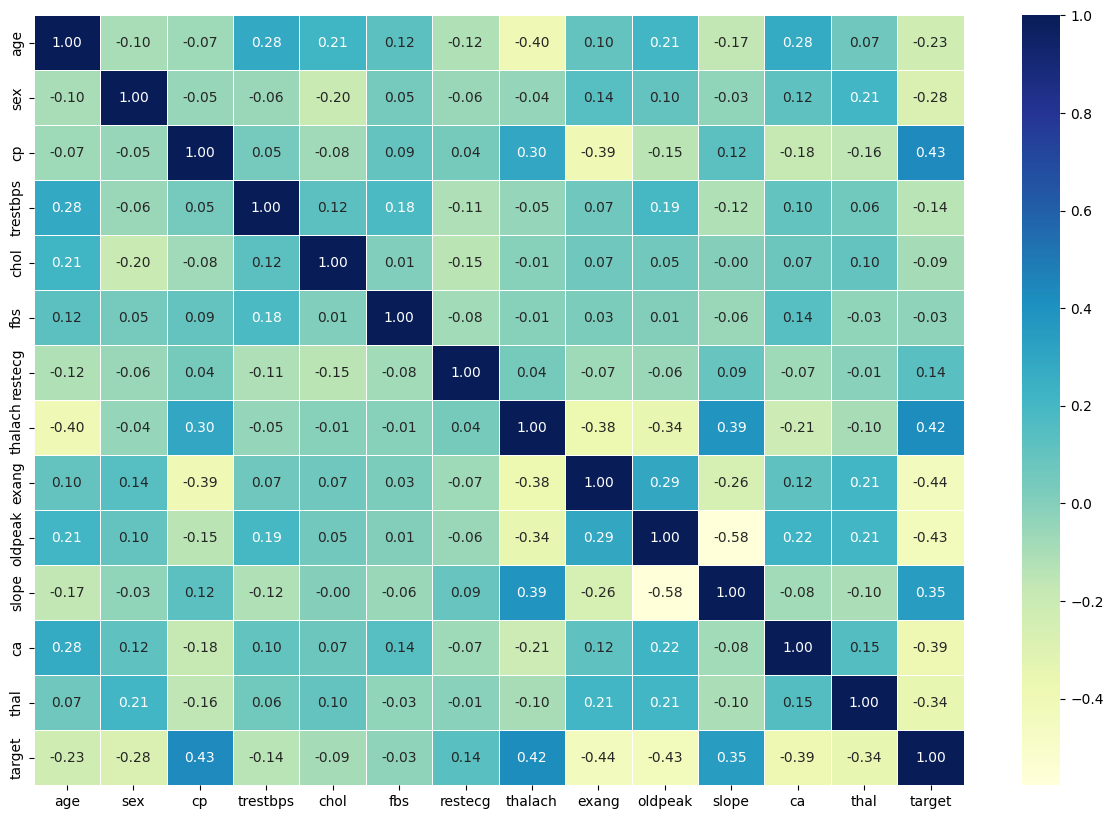

In [ ]:
# Plotting the Correlation Matrix for better visualisation
fig, ax = plt.subplots(figsize = (15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt="0.2f", cmap="YlGnBu")

## Modelling

In [ ]:
df.head()

### Separating Features and Labels from the Dataset

In [ ]:
X = df.drop("target", axis = 1)
X

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0     2  
3        2   0     2  
4        2   0     2  
..     ...  ..   ...  
298      1   0     3  
299      1   0     3  
300      1   2     3  
301      1   1     3  
302      1   1     2  

[303 rows x 13 columns]

In [ ]:
y = df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Splitting data into Train and Test Sets

In [ ]:
np.random.seed(111)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train

In [ ]:
y_train

281    0
293    0
146    1
188    0
264    0
      ..
118    1
169    0
275    0
86     1
212    0
Name: target, Length: 242, dtype: int64

### Choosing a Machine Learning Model
#### Models used:
1. Logistic Regression
2. K Nearest Neighbors (KNN)
3. Random Forest Classification
4. Support Vector Classification
5. Bagging
6. Boosting

In [ ]:
# Putting instances of the Models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC()
}

log_reg = LogisticRegression()
log_reg.fit(X_train)



# Function to Fit and Score the Model Performance
def fit_score(models, X_train, X_test, y_train, y_test):
    """
        Fits and Evaluates machine Learning Models
        models: dictionary of machine learning models from SciKit learn
        X_train: set of training features (no labels)
        X_test: set of test features (no labels)
        y_train: training labels
        y_test: test labels
    """
    # Set Random seed
    np.random.seed(111)

    # Dictionary to keep track of model scores
    model_scores = {}

    # Loop through all the models to fit and evaluate performance
    for name, model in models.items():
        # Fit model to the Training data
        model.fit(X_train, y_train)

        # Calculate accuracy using score function and storing result in dictionary
        model_scores[name] = model.score(X_test, y_test)

    return model_scores

In [ ]:
# Testing out the models using fit_score() function
model_scores = fit_score(models, X_train, X_test, y_train, y_test)

model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6065573770491803,
 'Random Forest': 0.8360655737704918,
 'SVC': 0.639344262295082}

### Model Comparison

<Axes: >

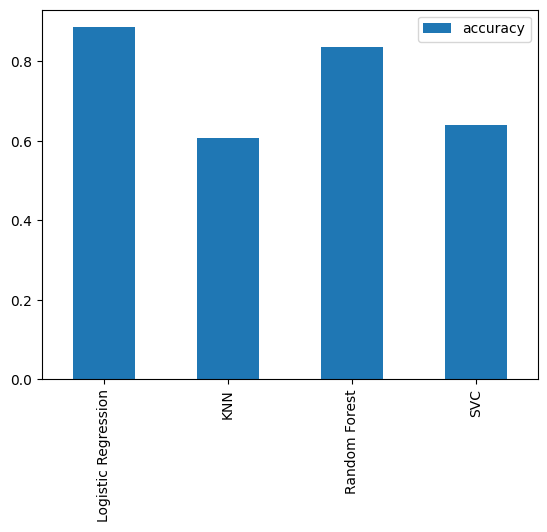

In [ ]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])

model_compare.T.plot.bar()

## Hyperparameter Tuning

### Hyperparameter Tuning for KNN

In [ ]:
# Tuning KNN Model

# Creating empty lists to store scores
train_scores = []
test_scores = []

# Taking a range from 1 to 20 to set neighbors in knn -> default is 5
neighbors = range(1,21)

# Looping through the neighbors and fitting and evaluating the model
for neighbor in neighbors:
    # Creating KNN instance
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

In [ ]:
train_scores

[1.0,
 0.8099173553719008,
 0.7851239669421488,
 0.7603305785123967,
 0.7768595041322314,
 0.756198347107438,
 0.7520661157024794,
 0.7355371900826446,
 0.71900826446281,
 0.6942148760330579,
 0.7107438016528925,
 0.6983471074380165,
 0.6983471074380165,
 0.6900826446280992,
 0.6983471074380165,
 0.6859504132231405,
 0.6859504132231405,
 0.6900826446280992,
 0.6735537190082644,
 0.6735537190082644]

In [ ]:
test_scores

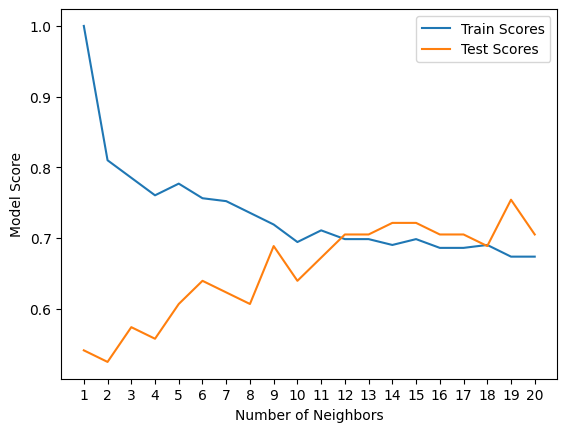

In [ ]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Scores")
plt.xlabel("Number of Neighbors")
plt.ylabel("Model Score")
plt.xticks(np.arange(1, 21, 1))
plt.legend()

Looking at the plot above, we can see that trying different values of neighbors did not improve the performance, and out KNN model is still inferior to the other 2 models.
Hence, we can discard this model and try to find the better model by tuning hyoerparameters for the remaining 2 models, i.e Logistic Regression and Random Forest Classification

### Hyperparameter Tuning for Logitic Regression and Random Forest Classification with RandomizedSearchCV

In [ ]:
# Creating hyperparameter grid for Logistic Regression
log_reg_grid = {
    "C": np.logspace(-4, 4, 20),
    "solver": ["liblinear"],
    "penalty": ["l1", "l2"]
}

# Creating hyperparamer grid for Random Forest Classification
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2)
}


In [ ]:
# Tuning Logistic Regression

np.random.seed(111)

# Setting random hyperparameter search
rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions=log_reg_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

# Fitting the model
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear']},
                   verbose=True)

In [ ]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Checking Best parameters
rs_log_reg.best_params_

{'solver': 'liblinear', 'penalty': 'l2', 'C': 0.23357214690901212}

In [ ]:
# Tuning Random Forest Classification

np.random.seed(111)

# Setting random hyperparameter search
rs_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions=rf_grid,
    cv=5,
    n_iter=20,
    verbose=True
)

rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [ ]:
rs_rf.score(X_test, y_test)

0.8524590163934426

In [ ]:
rs_rf.best_params_

{'n_estimators': 660,
 'min_samples_split': 6,
 'min_samples_leaf': 11,
 'max_depth': None}

### Hyperparameter Tuning for Logistic Regression with GridSearchCV

In [ ]:
np.random.seed(111)

# Setting up GridSearchCV
gs_log_reg = GridSearchCV(
    LogisticRegression(),
    param_grid=log_reg_grid,
    cv=5,
    verbose=True
)

gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [ ]:
# Checking Accuracy scores
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [ ]:
# Best Parameters
gs_log_reg.best_params_

{'C': 0.23357214690901212, 'solver': 'liblinear'}

# Bagging

In [ ]:
base_log_reg = LogisticRegression()
bag_clf = BaggingClassifier(base_estimator=base_log_reg, n_estimators=100)
bag_clf.fit(X_train, y_train.values.ravel())

BaggingClassifier(base_estimator=LogisticRegression(), n_estimators=100)

## Evaluation on the Train Set

In [ ]:
bag_pred_X_train=bag_clf.predict(X_train)
print(pd.crosstab(bag_pred_X_train,y_train,margins=True))

target    0    1  All
row_0                
0        86   11   97
1        23  122  145
All     109  133  242


In [ ]:
print('Bagging accuracy on the train set：%f' %bag_clf.score(X_train,y_train))

Bagging accuracy on the train set：0.859504


In [ ]:
f1_bag_train=f1_score(bag_pred_X_train,y_train,average='macro')
print('Bagging f1_score on the train set：%f' %f1_bag_train)

Bagging f1_score on the train set：0.856325


In [ ]:
error_bag_train=mean_squared_error(bag_pred_X_train,y_train)
print('Bagging mean_squared_error on the train set：%f' %error_bag_train)

Bagging mean_squared_error on the train set：0.140496


## Evaluation on the Test Set

In [ ]:
bag_pred_X_test=bag_clf.predict(X_test)
print(pd.crosstab(bag_pred_X_test,y_test,margins=True))

target   0   1  All
row_0              
0       25   4   29
1        4  28   32
All     29  32   61


In [ ]:
print('Bagging accuracy on the test set：%f' %bag_clf.score(X_test,y_test))

Bagging accuracy on the test set：0.868852


In [ ]:
f1_bag_test=f1_score(bag_pred_X_test,y_test,average='macro')
print('Bagging f1_score on the test set：%f' %f1_bag_test)

Bagging f1_score on the test set：0.868534


In [ ]:
error_bag_test=mean_squared_error(bag_pred_X_test,y_test)
print('Bagging mean_squared_error on the test set：%f' %error_bag_test)

Bagging mean_squared_error on the test set：0.131148


In [ ]:
X = df.iloc[:,0:13]
y = df.iloc[:,13]

In [ ]:
# Instantiate the selectKBest object
skb = SelectKBest(f_classif,k=8)
# Call the fit method
skb = skb.fit(X,y)

#Call the property scores_ to get the score returned by the f_classif
skb.scores_

array([16.11669982, 25.79219115, 69.77227149,  6.45816867,  2.20298345,
        0.23694234,  5.77720891, 65.1201044 , 70.95243822, 68.55143941,
       40.90207063, 54.5598338 , 40.40769615])

In [ ]:
# Call the property pvalues_ to get the P value returned by the f_classif
skb.pvalues_

array([7.52480130e-05, 6.67869212e-07, 2.46971211e-15, 1.15460592e-02,
       1.38790327e-01, 6.26777547e-01, 1.68398971e-02, 1.69733764e-14,
       1.52081384e-15, 4.08534639e-15, 6.10161062e-10, 1.49153874e-12,
       7.62487991e-10])

In [ ]:
# Returns the feature column index that is retained after feature filtering
skb.get_support(indices=True)

array([ 1,  2,  7,  8,  9, 10, 11, 12])

In [ ]:
X_new = skb.transform(X)
X_new = pd.DataFrame(X_new)
dfname_new = df.iloc[:,list(skb.get_support(indices=True))].columns
X_new.columns = dfname_new
X_new

sex   cp  thalach  exang  oldpeak  slope   ca  thal
0    1.0  3.0    150.0    0.0      2.3    0.0  0.0   1.0
1    1.0  2.0    187.0    0.0      3.5    0.0  0.0   2.0
2    0.0  1.0    172.0    0.0      1.4    2.0  0.0   2.0
3    1.0  1.0    178.0    0.0      0.8    2.0  0.0   2.0
4    0.0  0.0    163.0    1.0      0.6    2.0  0.0   2.0
..   ...  ...      ...    ...      ...    ...  ...   ...
298  0.0  0.0    123.0    1.0      0.2    1.0  0.0   3.0
299  1.0  3.0    132.0    0.0      1.2    1.0  0.0   3.0
300  1.0  0.0    141.0    0.0      3.4    1.0  2.0   3.0
301  1.0  0.0    115.0    1.0      1.2    1.0  1.0   3.0
302  0.0  1.0    174.0    0.0      0.0    1.0  1.0   2.0

[303 rows x 8 columns]

In [ ]:
y = pd.DataFrame(y)
y = y.reset_index(drop=True)
y

target
0         1
1         1
2         1
3         1
4         1
..      ...
298       0
299       0
300       0
301       0
302       0

[303 rows x 1 columns]

In [ ]:
X_new['target'] = y.iloc[:,0]

In [ ]:
data_new = X_new
data_new

sex   cp  thalach  exang  oldpeak  slope   ca  thal  target
0    1.0  3.0    150.0    0.0      2.3    0.0  0.0   1.0       1
1    1.0  2.0    187.0    0.0      3.5    0.0  0.0   2.0       1
2    0.0  1.0    172.0    0.0      1.4    2.0  0.0   2.0       1
3    1.0  1.0    178.0    0.0      0.8    2.0  0.0   2.0       1
4    0.0  0.0    163.0    1.0      0.6    2.0  0.0   2.0       1
..   ...  ...      ...    ...      ...    ...  ...   ...     ...
298  0.0  0.0    123.0    1.0      0.2    1.0  0.0   3.0       0
299  1.0  3.0    132.0    0.0      1.2    1.0  0.0   3.0       0
300  1.0  0.0    141.0    0.0      3.4    1.0  2.0   3.0       0
301  1.0  0.0    115.0    1.0      1.2    1.0  1.0   3.0       0
302  0.0  1.0    174.0    0.0      0.0    1.0  1.0   2.0       0

[303 rows x 9 columns]

## ROC Curve

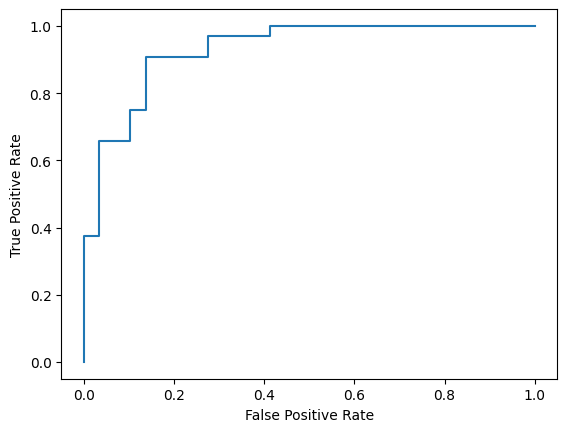

In [ ]:
y_pred_proba = bag_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Boosting

In [ ]:
gb_clf = GradientBoostingClassifier(n_estimators=100)
gb_clf.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier()

## Evaluation on the Train Set

In [ ]:
gb_pred_X_train=gb_clf.predict(X_train)
print(pd.crosstab(gb_pred_X_train,y_train,margins=True))

target    0    1  All
row_0                
0       109    0  109
1         0  133  133
All     109  133  242


In [ ]:
print('Boosting accuracy on the train set：%f' %gb_clf.score(X_train,y_train))

Boosting accuracy on the train set：1.000000


In [ ]:
f1_gb_train=f1_score(gb_pred_X_train,y_train,average='macro')
print('Boosting f1_score on the train set：%f' %f1_gb_train)

Boosting f1_score on the train set：1.000000


In [ ]:
error_gb_train=mean_squared_error(gb_pred_X_train,y_train)
print('Boosting mean_squared_error on the train set：%f' %error_gb_train)

Boosting mean_squared_error on the train set：0.000000


## Evaluation on the Test Set

In [ ]:
gb_pred_X_test=gb_clf.predict(X_test)
print(pd.crosstab(gb_pred_X_test,y_test,margins=True))

target   0   1  All
row_0              
0       23   8   31
1        6  24   30
All     29  32   61


In [ ]:
print('Boosting accuracy on the test set：%f' %gb_clf.score(X_test,y_test))

Boosting accuracy on the test set：0.770492


In [ ]:
f1_gb_test=f1_score(gb_pred_X_test,y_test,average='macro')
print('Boosting f1_score on the test set：%f' %f1_gb_test)

Boosting f1_score on the test set：0.770430


In [ ]:
error_gb_test=mean_squared_error(gb_pred_X_test,y_test)
print('Boosting mean_squared_error on the test set：%f' %error_gb_test)

Boosting mean_squared_error on the test set：0.229508


## ROC Curve

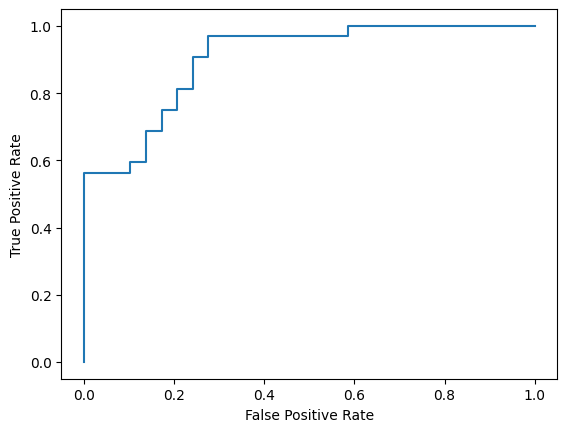

In [ ]:
y_pred_proba = gb_clf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Bagging Versus Boosting

<Axes: >

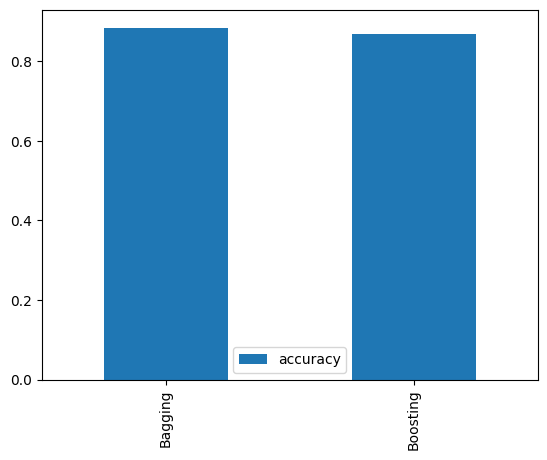

In [ ]:
mode_scores = {'Bagging': 0.885245,
 'Boosting': 0.868852,}

mode_compare = pd.DataFrame(mode_scores, index=['accuracy'])

mode_compare.T.plot.bar()

## Select the GBDT model



### Tuning parameter optimization

#### n_estimators

In [ ]:
param_test1 = {'n_estimators':range(10,200,10)}

gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=300,
                        min_samples_leaf=20,max_depth=8,max_features='sqrt', subsample=0.8,random_state=2022),
                        param_grid = param_test1, scoring='roc_auc',cv=5)
gsearch1.fit(X, y)

print(gsearch1.cv_results_['mean_test_score'], gsearch1.best_params_, gsearch1.best_score_)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5] {'n_estimators': 10} 0.5


#### max_dapth and *min_samples_split*

In [ ]:
param_test2 = {'max_depth':range(2,15,2),
               'min_samples_split':range(100,801,200)}

gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, min_samples_leaf=20,
                        max_features='sqrt', subsample=0.8, random_state=2022),
                        param_grid = param_test2, scoring='roc_auc', cv=5)

gsearch2.fit(X, y)

print(gsearch2.cv_results_['mean_test_score'], gsearch2.best_params_, gsearch2.best_score_)

[0.9122094  0.5        0.5        0.5        0.91158409 0.5
 0.5        0.5        0.91158409 0.5        0.5        0.5
 0.91158409 0.5        0.5        0.5        0.91158409 0.5
 0.5        0.5        0.91158409 0.5        0.5        0.5
 0.91158409 0.5        0.5        0.5       ] {'max_depth': 2, 'min_samples_split': 100} 0.9122093955427288


#### min_samples_split and min_samples_leaf

In [ ]:
param_test3 = {'min_samples_split':range(800,1900,200),
               'min_samples_leaf':range(60,101,10)}

gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7,
                        max_features='sqrt', subsample=0.8, random_state=2022),
                        param_grid = param_test3, scoring='roc_auc', cv=5, verbose=3)

gsearch3.fit(X, y)

print(gsearch3.cv_results_['mean_test_score'], gsearch3.best_params_, gsearch3.best_score_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END min_samples_leaf=60, min_samples_split=800;, score=0.500 total time=   0.1s
[CV 2/5] END min_samples_leaf=60, min_samples_split=800;, score=0.500 total time=   0.1s
[CV 3/5] END min_samples_leaf=60, min_samples_split=800;, score=0.500 total time=   0.1s
[CV 4/5] END min_samples_leaf=60, min_samples_split=800;, score=0.500 total time=   0.1s
[CV 5/5] END min_samples_leaf=60, min_samples_split=800;, score=0.500 total time=   0.1s
[CV 1/5] END min_samples_leaf=60, min_samples_split=1000;, score=0.500 total time=   0.1s
[CV 2/5] END min_samples_leaf=60, min_samples_split=1000;, score=0.500 total time=   0.1s
[CV 3/5] END min_samples_leaf=60, min_samples_split=1000;, score=0.500 total time=   0.1s
[CV 4/5] END min_samples_leaf=60, min_samples_split=1000;, score=0.500 total time=   0.2s
[CV 5/5] END min_samples_leaf=60, min_samples_split=1000;, score=0.500 total time=   0.2s
[CV 1/5] END min_samples_leaf=60, min_sampl

#### max_features

In [ ]:
param_test4 = {'max_features':range(7,20,2)}

gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_leaf =60,
                        min_samples_split =1200, subsample=0.8, random_state=2022),
                        param_grid = param_test4, scoring='roc_auc', cv=5)
gsearch4.fit(X, y)

print(gsearch4.cv_results_['mean_test_score'], gsearch4.best_params_, gsearch4.best_score_)

[0.5 0.5 0.5 0.5 0.5 0.5 0.5] {'max_features': 7} 0.5


#### subsample

In [ ]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}

gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_leaf =60,
                        min_samples_split =1200, max_features=9, random_state=2022),
                        param_grid = param_test5, scoring='roc_auc', cv=5)
gsearch5.fit(X, y)

print(gsearch5.cv_results_['mean_test_score'], gsearch5.best_params_, gsearch5.best_score_)

[0.5 0.5 0.5 0.5 0.5 0.5] {'subsample': 0.6} 0.5


In [ ]:
gb2_clf = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=7, min_samples_leaf =60,
               min_samples_split =1200, max_features=9, subsample=0.7, random_state=2022)
gb2_clf.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=7, max_features=9, min_samples_leaf=60,
                           min_samples_split=1200, n_estimators=60,
                           random_state=2022, subsample=0.7)

## Model Evaluation

#### Techniques Used:
1. Confusion matrix
2. Precision
3. Recall
4. F1 Score
5. Classification Report
6. ROC Curve
7. ROC Area Under the Curve (AUC)

In [ ]:
# Predicting Labels for Test Features
y_pred = gs_log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [ ]:
y_test.values

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

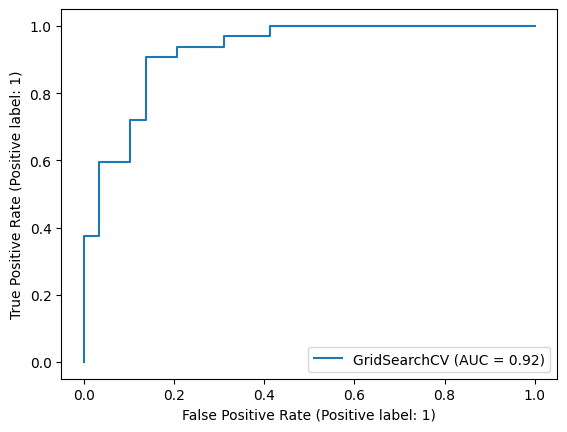

In [ ]:
# Plotting the ROC AUC
RocCurveDisplay.from_estimator(estimator=gs_log_reg, X=X_test, y=y_test)

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 25.722222222222214, 'Predicted Label')

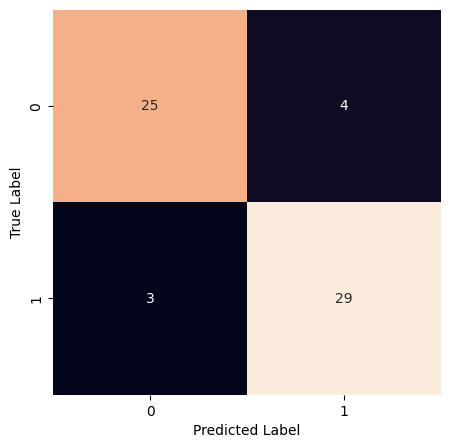

In [ ]:
# Visualising Confusion Matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax = sns.heatmap(conf_matrix, annot=True, cbar=False)

plt.ylabel("True Label")
plt.xlabel("Predicted Label")



In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [ ]:
# Classification Report using Cross Validation -> cross_val_score()
np.random.seed(42)
# Check Best Parameters
gs_log_reg.best_params_


{'C': 0.23357214690901212, 'solver': 'liblinear'}

In [ ]:
# Create a new instance of classifier using best parameters
clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")


In [ ]:
# Cross-Validated Accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
np.mean(cv_acc)

0.8479781420765027

In [ ]:
# Cross-Validated Precision
cv_prec = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_prec)

0.8215873015873015

In [ ]:
# Cross-Validated Recall
cv_rec = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_rec)

0.9272727272727274

In [ ]:
# Cross-Validated F1 score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8705403543192143

<Axes: title={'center': 'Cross-Validated Clasification Metrics'}>

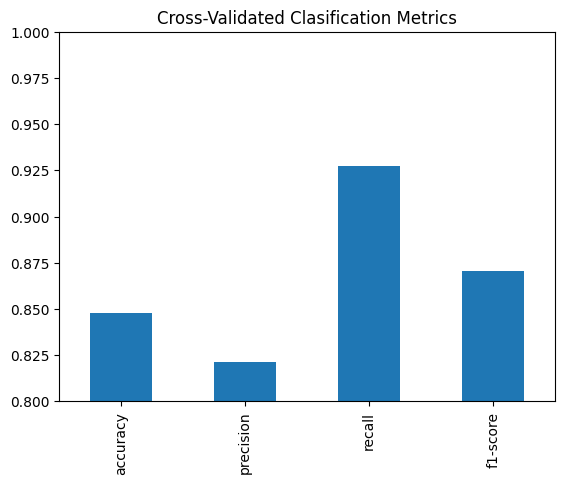

In [ ]:
# Visualising Metrics
cv_metrics = pd.DataFrame({
    "accuracy": np.mean(cv_acc),
    "precision": np.mean(cv_prec),
    "recall": np.mean(cv_rec),
    "f1-score": np.mean(cv_f1)
    },
    index=[0]
)

cv_metrics.T.plot.bar(title="Cross-Validated Clasification Metrics", legend=False,ylim=(0.8, 1))

##Learning Curve

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

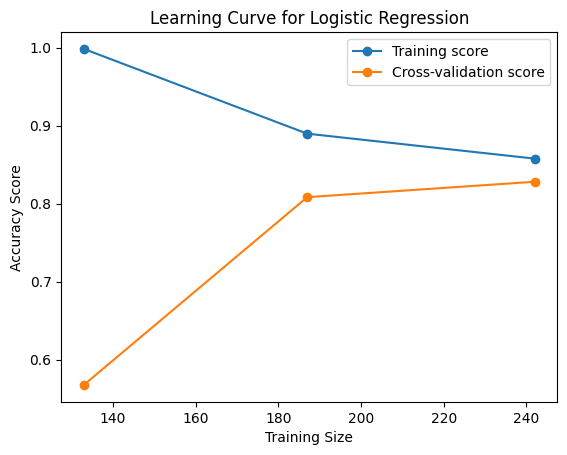

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression
# Generate Learning Curve
train_sizes, train_scores, test_scores = learning_curve(LogisticRegression(), X, y, cv=5)

# Calculate the average score of training set and test set
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, test_scores_mean, 'o-', label='Cross-validation score')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()

## Model Random Forest Tree Graph

In [ ]:
model = RandomForestClassifier(max_depth=5)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
estimator = model.estimators_[1]
feature_names = [i for i in X_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(estimator, out_file='tree.dot',
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True,
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

## Permutation Importance Table

In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

## SHAP

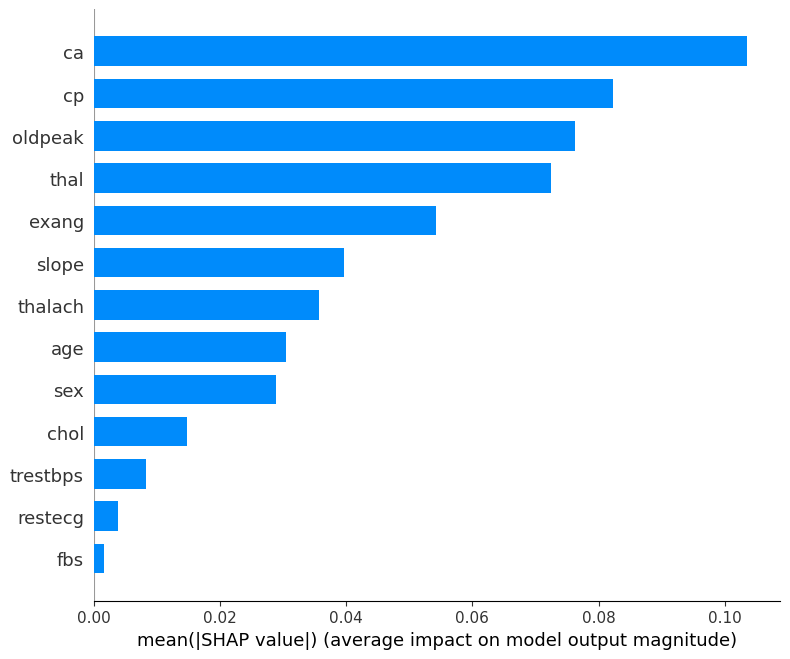

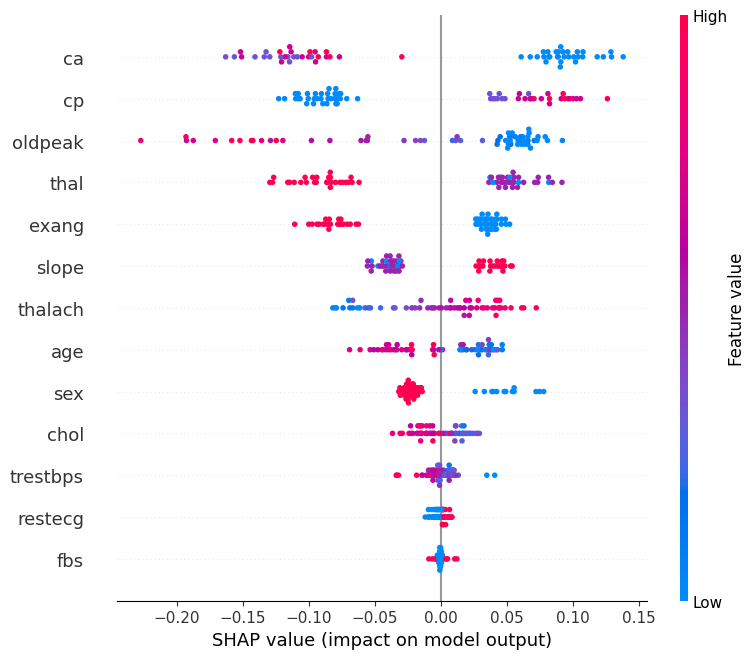

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")
shap.summary_plot(shap_values[1], X_test)

## Forward Backward Code

In [ ]:
def sigmoid(z):
    """Sigmoid activation function."""
    return 1 / (1 + np.exp(-z))

In [ ]:
def initialize(dimension):
    """Initialize the weight and bias."""
    weight = np.full((dimension, 1), 0.01)
    bias = 0.0
    return weight, bias

In [ ]:
def forward_backward_propagation(weight, bias, x_train, y_train):
    """Forward and backward propagation to calculate the gradient and cost."""
    # Forward
    y_head = sigmoid(np.dot(np.array(weight).T, x_train) + bias)
    loss = -(y_train * np.log(y_head) + (1 - y_train) * np.log(1 - y_head))
    cost = np.sum(loss) / x_train.shape[1]

    # Backward
    derivative_weight = np.dot(x_train, (y_head - y_train).T) / x_train.shape[1]
    derivative_bias = np.sum(y_head - y_train) / x_train.shape[1]
    gradients = {"Derivative Weight": derivative_weight, "Derivative Bias": derivative_bias}

    return cost, gradients

In [ ]:
def update_parameters(weight, bias, x_train, y_train, learning_rate, iterations):
    """Update the model parameters using gradient descent."""
    cost_list = []
    index = []

    for i in range(iterations):
        cost, gradients = forward_backward_propagation(weight, bias, x_train, y_train)
        weight -= learning_rate * gradients["Derivative Weight"]
        bias -= learning_rate * gradients["Derivative Bias"]

        cost_list.append(cost)
        index.append(i)

    parameters = {"weight": weight, "bias": bias}

    plt.plot(index, cost_list)
    plt.xlabel("Number of Iterations")
    plt.ylabel("Cost")
    plt.title("Cost reduction over iterations")
    plt.show()

    return parameters

In [ ]:
def predict(weight, bias, x_test, threshold=0.5):
    """Predict binary labels for the test set."""
    z = np.dot(np.array(weight).T, x_test) + bias
    y_head = sigmoid(z)
    y_prediction = np.where(y_head > threshold, 1, 0)
    return y_prediction

In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, iterations):
    """Logistic regression function that trains and tests the model."""
    dimension = x_train.shape[0]  # Feature count
    weight = initialize(dimension)
    bias = initialize(dimension)

    parameters = update_parameters(weight, bias, x_train, y_train, learning_rate, iterations)

    y_prediction = predict(parameters["weight"], parameters["bias"], x_test)
    test_accuracy = 100 - np.mean(np.abs(y_prediction - y_test)) * 100

    print("Manual Test Accuracy: {:.2f}%".format(test_accuracy))
    return parameters

In [ ]:
data_for_prediction = X_test.iloc[1, :].astype(float)
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)
    data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [ ]:
# Select a specific patient's data for prediction
data_for_prediction = X_test.iloc[1, :].astype(float)

# Define the function to create the SHAP force plot
def heart_disease_risk_factors(model, patient):
    explainer = shap.TreeExplainer(model)  # Create the explainer
    shap_values = explainer.shap_values(patient)  # Calculate the SHAP values
    shap.initjs()  # Initialize JavaScript visualization in the notebook
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

# Call the function and display the plot
shap_plot = heart_disease_risk_factors(model, data_for_prediction)
shap.save_html('shap_plot.html', shap_plot) # Save the plot to an HTML file
shap_plot  # This will display the plot in the notebook

In [ ]:
# Select a specific patient's data for prediction
data_for_prediction = X_test.iloc[1, :].astype(float)

# Define the function to create the SHAP force plot
def heart_disease_risk_factors(model, patient):
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    # For inline display in Colab, we do not need to initialize JavaScript
    # shap.initjs() is not required in Colab environment
    force_plot = shap.force_plot(explainer.expected_value[1], shap_values[1], patient)
    return force_plot

# Call the function and display the plot
shap_plot = heart_disease_risk_factors(model, data_for_prediction)

# Display the plot in Google Colab
shap.initjs()
display(shap_plot)